In [114]:
#importing standard libraries.  More esoteric libraries
#will be imported down below as needed

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import re

In [115]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

In [144]:
#import data set as dataframe and use smaller subset
#for simple modeling purposes
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick


Freshness                                             Review
0             1   Manakamana doesn't answer any questions, yet ...
1             1   Wilfully offensive and powered by a chest-thu...
2             0   It would be difficult to imagine material mor...
3             0   Despite the gusto its star brings to the role...
4             0   If there was a good idea at the core of this ...
5             0   Gleeson goes the Hallmark Channel route, dama...
6             1   It was the height of satire in 1976: dark as ...
7             0   Everyone in "The Comedian" deserves a better ...
8             0   Actor encourages grumpy Christians to embrace...
9             1          Slight, contained, but ineffably soulful.
10            1   Bell's debut feature addresses its subject wi...
11            1   ... except for its shamelessly (and irresisti...
12            0   This is not one for the uninitiated. It's als...
13            1   Son of Saul employs the formal mechanics of f...
14            0   It isn't thrilling. Fox can't act. The backch...
15            0   Hiddleston and Swinton are lovely to watch, b...
16            1   Yossi is a stronger film than its predecessor...
17            1   I feel like a Sparkle Baby just puked rainbow...
18            0                              Long, unfocused film.
19            1   Kubo and the Two Strings is better than immer...
20            0   Easy to enjoy, if you're at all susceptible t...
21            1   An extraordinary blast from the past, X-Men: ...
22            1   Mostly lightweight, but the most interesting ...
23            1   Drawn, per a disclaimer, from period accounts...
24            1   ... hones its dramatic elements to emotional ...
25            0   What seemed like a decent idea - a fourth and...
26            0   Free Birds is unappealingly staged and paced ...
27            0   A joyless, misanthropic 105 minutes worth of ...
28            0   This one, directed by John Glen, just follows...
29            1   The movie is purely visceral, generating adre...
...         ...                                                ...
9970          0   There's nothing worthwhile about a single mom...
9971          0   The story stagnates with the null drawing of ...
9972          1   Writer/director Paul Thomas Anderson's period...
9973          0   The only reasons to see this structurally mes...
9974          0   I've never seen Kristen Bell more unlikable a...
9975          0   Mann seems undecided about what he wants Enem...
9976          0   Gigi is dressed to kill, but if all the Frenc...
9977          1   Tells a specifically Chinese story, and yet i...
9978          0   Man of Steel starts feeling like just another...
9979          0   The sex was good but the delirious lesbian mu...
9980          1   There is so much attention to detail, it's ge...
9981          1   While none of it's anything particularly spec...
9982          1   Hayek and Lithgow are outstanding in their le...
9983          0   [VIDEO ESSAY] Indolent pacing combines with t...
9984          0   The least fun of the three: overworked and un...
9985          1   Extremely original masterpiece in British cinema
9986          1   The pugnacious John C. is gifted and knows no...
9987          1   Saoirse Ronan plays this interior drama with ...
9988          1   Karolina Gruszka is very good as Curie, conve...
9989          1   An altogether astonishing film, not in the le...
9990          0   Scott's film can't quite decide whether it's ...
9991          1   More than just a not-so-instant replay...even...
9992          1   Screenwriter Rebecca Frayn's full feature deb...
9993          0   The cast adds little. Columbus Short, a dance...
9994          1   But the film's fascination lies less in its p...
9995          0   Can a video game turn a movie into a hit, man...
9996          0   If you swallow this type of thing no matter w...
9997          1   It all escalates into an arch, know

In [162]:
#using regexp notation to get rid of numbers in reviews

df_quick["Review"] = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
df_quick.Review[0]
# r"\d+"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


' Manakamana doesnt answer any questions yet makes its point Nepal like the rest of our planet is a picturesque but far from peaceable kingdom'

In [131]:
#create a model to make a word counts matrix from the docs
#This model will lowercase words, stip accents, take out english stop words, and 
# take out obscure words, and possibly words that appear to often

count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=100000)
X_train_counts = count_vect.fit_transform(df_quick.Review.values)

In [132]:
# These are the words in our vocabulary to serve as 
# feature names
feature_names = count_vect.get_feature_names()
feature_names

['aa',
 'aahing',
 'aardman',
 'aardmans',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abbas',
 'abbasi',
 'abbie',
 'abdellah',
 'abductees',
 'abdul',
 'abduls',
 'abel',
 'abercrombie',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'abjectly',
 'able',
 'ably',
 'aboard',
 'abolishment',
 'abominable',
 'abondamment',
 'aboriginal',
 'abortion',
 'abortions',
 'abound',
 'aboveaverage',
 'abracadabra',
 'abraham',
 'abrahamson',
 'abrahamsons',
 'abrams',
 'abrasive',
 'abridgment',
 'abroad',
 'abrupt',
 'abruptly',
 'abruptness',
 'abs',
 'absence',
 'absences',
 'absent',
 'absolute',
 'absolutely',
 'absolving',
 'absorb',
 'absorbing',
 'absorbs',
 'absorptive',
 'abstemious',
 'abstract',
 'abstraction',
 'abstractly',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'absurdlyoverrated',
 'abu',
 'abundance',
 'abundant',
 'aburrida',
 'aburrimiento',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysm

In [133]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

aa                   0
aahing               1
aardman              2
aardmans             3
aaron                4
ab                   5
abandon              6
abandoned            7
abandonment          8
abandons             9
abbas                10
abbasi               11
abbie                12
abdellah             13
abductees            14
abdul                15
abduls               16
abel                 17
abercrombie          18
abide                19
abiding              20
abilities            21
ability              22
abject               23
abjectly             24
able                 25
ably                 26
aboard               27
abolishment          28
abominable           29
abondamment          30
aboriginal           31
abortion             32
abortions            33
abound               34
aboveaverage         35
abracadabra          36
abraham              37
abrahamson           38
abrahamsons          39
abrams               40
abrasive             41
ab

blanket              1899
blanks               1900
blaring              1901
blas                 1902
blasphemies          1903
blast                1904
blasted              1905
blasting             1906
blatancy             1907
blatant              1908
blatantly            1909
blather              1910
blaze                1911
blazes               1912
blazing              1913
bleach               1914
bleaches             1915
bleak                1916
bleakest             1917
bleakly              1918
bleakness            1919
blearily             1920
bleary               1921
bleecker             1922
bleed                1923
bleedsome            1924
blend                1925
blended              1926
blender              1927
blending             1928
blends               1929
bless                1930
blessed              1931
blessedly            1932
blessing             1933
blessings            1934
blight               1935
blimps               1936
blind       

clock                3399
clocking             3400
clocks               3401
clockwatching        3402
clockwork            3403
clodhopping          3404
clogged              3405
clone                3406
clooney              3407
clooneys             3408
close                3409
closed               3410
closedoff            3411
closely              3412
closer               3413
closerange           3414
closes               3415
closest              3416
closet               3417
closeted             3418
closeup              3419
closeups             3420
closing              3421
closingcredit        3422
closure              3423
closures             3424
cloth                3425
clothed              3426
clothes              3427
clothing             3428
clotted              3429
cloud                3430
cloudburst           3431
clouds               3432
cloverfield          3433
cloverfieldk         3434
clovers              3435
clowes               3436
clown       

demand               4898
demanded             4899
demanding            4900
demands              4901
demeaning            4902
demeanor             4903
demeans              4904
demented             4905
demise               4906
demme                4907
demmeesque           4908
demo                 4909
democracy            4910
demographic          4911
demolishing          4912
demolition           4913
demolitionderby      4914
demon                4915
demonaco             4916
demonic              4917
demonising           4918
demons               4919
demonstrate          4920
demonstrated         4921
demonstrates         4922
demonstrating        4923
demonstrative        4924
den                  4925
denaturalize         4926
dench                4927
denchs               4928
deneuves             4929
denial               4930
denied               4931
denies               4932
denis                4933
deniz                4934
denizens             4935
dennis      

fails                6891
failure              6892
failures             6893
faint                6894
faintest             6895
faintly              6896
fair                 6897
faire                6898
fairer               6899
fairground           6900
fairly               6901
fairy                6902
fairytale            6903
fairytalein          6904
faith                6905
faithbased           6906
faithful             6907
fake                 6908
fakeafrican          6909
fakerussian          6910
fakiness             6911
falcon               6912
falcones             6913
falk                 6914
fall                 6915
fallen               6916
falling              6917
falloff              6918
fallor               6919
falls                6920
false                6921
falsely              6922
falstaff             6923
falta                6924
falter               6925
falters              6926
fame                 6927
famed                6928
familial    

graceful             8397
gracefully           8398
graces               8399
gracia               8400
gracie               8401
graciosos            8402
gracious             8403
grade                8404
gradea               8405
graders              8406
gradeschool          8407
gradez               8408
grading              8409
gradual              8410
gradually            8411
graduated            8412
graduates            8413
graff                8414
graffiti             8415
grafted              8416
graham               8417
grahame              8418
grain                8419
gramellini           8420
gramellinis          8421
grammatically        8422
grammer              8423
grams                8424
gran                 8425
grand                8426
granddaddy           8427
grandes              8428
grandest             8429
grandeur             8430
grandiose            8431
grandly              8432
grandmas             8433
grandmother          8434
grandpa     

independence         9897
independent          9898
independently        9899
indepth              9900
index                9901
india                9902
indian               9903
indiana              9904
indicate             9905
indicated            9906
indication           9907
indicative           9908
indicting            9909
indictment           9910
indie                9911
indiefilm            9912
indieflavored        9913
indiepop             9914
indierock            9915
indies               9916
indiespirit          9917
indifference         9918
indifferently        9919
indigestible         9920
indignation          9921
indignities          9922
indirectly           9923
indistinct           9924
indistinguishable    9925
individual           9926
individuals          9927
indolent             9928
indoors              9929
induces              9930
inducing             9931
indulge              9932
indulged             9933
indulgence           9934
indulgent   

loudest              11608
loudhailed           11609
loudly               11610
lough                11611
louis                11612
lousy                11613
lovability           11614
lovable              11615
lovably              11616
love                 11617
loveable             11618
loved                11619
lovehate             11620
loveitorhateit       11621
loveliest            11622
lovelifts            11623
lovelorn             11624
lovely               11625
lover                11626
lovers               11627
loves                11628
lovesick             11629
lovestory            11630
lovin                11631
loving               11632
lovingly             11633
lovings              11634
low                  11635
lowbrow              11636
lowbudget            11637
lowcal               11638
lowconcept           11639
lowdown              11640
lowe                 11641
lowell               11642
lowenergy            11643
lower                11644
l

notion               13396
notions              13397
notorious            13398
notoutrightfantasy   13399
notoverlycomplicated 13400
notquiteaswear       13401
notquitedead         13402
notquitegrownups     13403
notre                13404
notso                13405
notsobright          13406
notsoinstant         13407
notsospecial         13408
notverygood          13409
notwithstanding      13410
noughties            13411
nouns                13412
nourishing           13413
nous                 13414
nouvelle             13415
novel                13416
novelinspired        13417
novelist             13418
novella              13419
novels               13420
novelty              13421
novice               13422
novices              13423
nowfamiliar          13424
noyces               13425
nph                  13426
nra                  13427
nth                  13428
ntsb                 13429
nuance               13430
nuanced              13431
nuances              13432
n

portman              14895
portmanteau          14896
portnoys             14897
portrait             14898
portraitdoesnt       14899
portraits            14900
portraiture          14901
portray              14902
portrayal            14903
portrayals           14904
portrayed            14905
portraying           14906
portrays             14907
portuguese           14908
pose                 14909
posed                14910
poses                14911
posing               14912
position             14913
positioned           14914
positioning          14915
positions            14916
positive             14917
positively           14918
positives            14919
positivity           14920
posse                14921
possess              14922
possesses            14923
possession           14924
possessions          14925
possibilities        14926
possibility          14927
possible             14928
possibly             14929
post                 14930
postapartheid        14931
p

saddest              16895
saddle               16896
saddled              16897
saddling             16898
sadism               16899
sadistic             16900
sadistically         16901
sadly                16902
sadness              16903
sadomasochistic      16904
sadowski             16905
sadsacks             16906
safe                 16907
safely               16908
safeness             16909
safety               16910
saga                 16911
sagacity             16912
sagging              16913
sags                 16914
said                 16915
sail                 16916
saint                16917
saintexuprys         16918
saintly              16919
saints               16920
saintsandsinners     16921
sajids               16922
sake                 16923
saks                 16924
salacious            16925
saldana              16926
saldanha             16927
sale                 16928
salem                16929
sales                16930
salesgirl            16931
s

sons                 18394
sony                 18395
soon                 18396
sooner               18397
soons                18398
soontobeforgotten    18399
soothing             18400
sophisticated        18401
sophisticates        18402
sophistication       18403
sophomore            18404
sophomoric           18405
soporific            18406
soppy                18407
sorcerer             18408
sorcerers            18409
sorcery              18410
sore                 18411
sorely               18412
sorkin               18413
sorkins              18414
sorority             18415
sorprendente         18416
sorrowful            18417
sorrows              18418
sorry                18419
sort                 18420
sorta                18421
sorted               18422
sorting              18423
sorts                18424
sos                  18425
soso                 18426
sosoap               18427
souffle              18428
sought               18429
soul                 18430
s

transcendence        20394
transcendent         20395
transcending         20396
transcends           20397
transfer             20398
transfixing          20399
transform            20400
transformation       20401
transformations      20402
transformative       20403
transformed          20404
transformer          20405
transformers         20406
transforming         20407
transforms           20408
transgender          20409
transgression        20410
transgressions       20411
transgressive        20412
transgressiveness    20413
transgressors        20414
transience           20415
transition           20416
transitional         20417
translate            20418
translated           20419
translates           20420
translation          20421
translucent          20422
transmission         20423
transmit             20424
transparent          20425
transpires           20426
transplant           20427
transport            20428
transporter          20429
transporting         20430
t

worry                22140
worrying             22141
worse                22142
worship              22143
worshipped           22144
worst                22145
worth                22146
worthington          22147
worthless            22148
worthwhile           22149
worthy               22150
wouldbe              22151
wouldnt              22152
wouldve              22153
wound                22154
wounded              22155
wounds               22156
woven                22157
wow                  22158
wowed                22159
wrap                 22160
wrapped              22161
wrapper              22162
wrapping             22163
wraps                22164
wrapup               22165
wrath                22166
wreak                22167
wreathed             22168
wreck                22169
wreckage             22170
wrecked              22171
wreckit              22172
wrecks               22173
wrenching            22174
wrenchingly          22175
wrest                22176
w

In [134]:
count_vect.vocabulary_.keys()

dict_keys(['manakamana', 'doesnt', 'answer', 'questions', 'makes', 'point', 'nepal', 'like', 'rest', 'planet', 'picturesque', 'far', 'peaceable', 'kingdom', 'wilfully', 'offensive', 'powered', 'chestthumping', 'machismo', 'good', 'clean', 'fun', 'difficult', 'imagine', 'material', 'wrong', 'spade', 'lost', 'despite', 'gusto', 'star', 'brings', 'role', 'hard', 'ride', 'shotgun', 'hectors', 'voyage', 'discovery', 'idea', 'core', 'film', 'buried', 'unsightly', 'pile', 'flatulence', 'jokes', 'dogrelated', 'bad', 'puns', 'ridiculous', 'serial', 'arson', 'plot', 'gleeson', 'goes', 'hallmark', 'channel', 'route', 'damaging', 'intermittently', 'curious', 'entry', 'time', 'travel', 'subgenre', 'height', 'satire', 'dark', 'hell', 'patently', 'absurd', 'surely', 'close', 'objective', 'reality', 'surpassed', 'jerry', 'springer', 'era', 'comedian', 'deserves', 'better', 'movie', 'actor', 'encourages', 'grumpy', 'christians', 'embrace', 'season', 'slight', 'contained', 'ineffably', 'soulful', 'bells

In [135]:
#check to see if I can look up a word from count vect
# matrix which is in a particular document. Yes!
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key]==2323:
        print(key)


bridget


In [136]:
# stop words currently in "english". Could add to this 
# list later.
count_vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [137]:
#Convert from sparse array to numpy array
X_train_counts
X_train_counts_arr = X_train_counts.toarray()
X_train_counts_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
# getting indices of features in matrix for doc1
type(X_train_counts_arr)
ind = X_train_counts[0].nonzero()
ind[1]

array([10849, 14259,  6968, 14539, 14669, 16341, 11378, 13139, 14784,
       11843, 15581,   751,  5530, 11881], dtype=int32)

In [140]:
# showing words in doc 1 that are represented in counts matrix
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key] in ind[1]:
        print(key)

manakamana
doesnt
answer
questions
makes
point
nepal
like
rest
planet
picturesque
far
peaceable
kingdom


 do I want to stem or lemmatize?
 much adieu about nothing!!!  However, I do want to take out the numbers...they are driving me crazy....regex to the rescue. Also, why doesn't peace show up in doc 1?

In [141]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

In [142]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [127]:
# 1. Create a set of documents.
corpus = [' '.join(df_quick['Review']).lower() for row in df_quick]
print(corpus)

[' manakamana doesn\'t answer any questions, yet makes its point: nepal, like the rest of our planet, is a picturesque but far from peaceable kingdom.  wilfully offensive and powered by a chest-thumping machismo, but it\'s good clean fun.  it would be difficult to imagine material more wrong for spade than lost & found.  despite the gusto its star brings to the role, it\'s hard to ride shotgun on hector\'s voyage of discovery.  if there was a good idea at the core of this film, it\'s been buried in an unsightly pile of flatulence jokes, dog-related bad puns and a ridiculous serial arson plot.  gleeson goes the hallmark channel route, damaging an intermittently curious entry in the time travel subgenre.  it was the height of satire in : dark as hell, but patently absurd and surely nowhere close to objective reality. objective reality surpassed it somewhere in the jerry springer era.  everyone in "the comedian" deserves a better movie than "the comedian."  actor encourages grumpy christi

In [165]:
df_corpus = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
bag_of_words = " ".join(df_corpus)
bag_of_words.lower()
df_corpus =df_corpus.str.lower()

In [166]:
# 2. Create a set of tokenized documents.
docs_tokenized = [word_tokenize(content) for content in df_corpus]
docs_tokenized


[['manakamana',
  'doesnt',
  'answer',
  'any',
  'questions',
  'yet',
  'makes',
  'its',
  'point',
  'nepal',
  'like',
  'the',
  'rest',
  'of',
  'our',
  'planet',
  'is',
  'a',
  'picturesque',
  'but',
  'far',
  'from',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'and',
  'powered',
  'by',
  'a',
  'chestthumping',
  'machismo',
  'but',
  'its',
  'good',
  'clean',
  'fun'],
 ['it',
  'would',
  'be',
  'difficult',
  'to',
  'imagine',
  'material',
  'more',
  'wrong',
  'for',
  'spade',
  'than',
  'lost',
  'found'],
 ['despite',
  'the',
  'gusto',
  'its',
  'star',
  'brings',
  'to',
  'the',
  'role',
  'its',
  'hard',
  'to',
  'ride',
  'shotgun',
  'on',
  'hectors',
  'voyage',
  'of',
  'discovery'],
 ['if',
  'there',
  'was',
  'a',
  'good',
  'idea',
  'at',
  'the',
  'core',
  'of',
  'this',
  'film',
  'its',
  'been',
  'buried',
  'in',
  'an',
  'unsightly',
  'pile',
  'of',
  'flatulence',
  'jokes',
  'dogrelated',
  'bad',


In [167]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs_stop = [[word for word in words if word not in stop] for words in docs_tokenized]
docs_stop

[['manakamana',
  'doesnt',
  'answer',
  'questions',
  'yet',
  'makes',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chestthumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hectors',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'jokes',
  'dogrelated',
  'bad',
  'puns',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'goes',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'o

In [174]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs_stop]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_stop]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs_stop]
docs_wordnet


[['manakamana',
  'doesnt',
  'answer',
  'question',
  'yet',
  'make',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chestthumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hector',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'joke',
  'dogrelated',
  'bad',
  'pun',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'go',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'objectiv

In [198]:
docs_wordnet
new_element =[]
for element in docs_wordnet:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series = pd.Series(new_element)
new_series
col = "text"
new_df = pd.DataFrame(new_series,columns = [col])
new_df

text
0     manakamana doesnt answer question yet make poi...
1     wilfully offensive powered chestthumping machi...
2     would difficult imagine material wrong spade l...
3     despite gusto star brings role hard ride shotg...
4     good idea core film buried unsightly pile flat...
5     gleeson go hallmark channel route damaging int...
6     height satire dark hell patently absurd surely...
7      everyone comedian deserves better movie comedian
8      actor encourages grumpy christian embrace season
9                    slight contained ineffably soulful
10    bell debut feature address subject humor intel...
11    except shamelessly irresistibly zingy music sc...
12    one uninitiated also one people like action th...
13    son saul employ formal mechanic filmmaking tur...
14    isnt thrilling fox cant act backchat filthy funny
15            hiddleston swinton lovely watch need chew
16    yossi stronger film predecessor deeply felt le...
17    feel like sparkle baby puked rainbowcolored du...
18                                  long unfocused film
19    kubo two string better immersive absorptive pu...
20    easy enjoy youre susceptible sort thing leaf n...
21    extraordinary blast past xmen first class go o...
22    mostly lightweight interesting part movie jami...
23    drawn per disclaimer period account strange ph...
24    hone dramatic element emotional effect rather ...
25    seemed like decent idea fourth final stroll am...
26    free bird unappealingly staged paced uneven sl...
27    joyless misanthropic minute worth comedy rate ...
28    one directed john glen follows number plodding...
29    movie purely visceral generating adrenaline al...
...                                                 ...
9970  there nothing worthwhile single moment even pr...
9971  story stagnates null drawing character cadence...
9972  writerdirector paul thomas anderson period pie...
9973  reason see structurally messy poorly directed ...
9974  ive never seen kristen bell unlikable kelsey g...
9975  mann seems undecided want enemy accomplish try...
9976  gigi dressed kill french finery impress custom...
9977  tell specifically chinese story yet completely...
9978  man steel start feeling like another generic s...
9979  sex good delirious lesbian mumblecore didnt le...
9980  much attention detail genuinely fun look imagi...
9981  none anything particularly spectacular memorab...
9982  hayek lithgow outstanding lead role spiritual ...
9983  video essay indolent pacing combine tonedeaf d...
9984              least fun three overworked uninspired
9985      extremely original masterpiece british cinema
9986  pugnacious john c gifted know bound walking ha...
9987  saoirse ronan play interior drama intelligence...
9988  karolina gruszka good curie conveying mix inte...
9989  altogether astonishing film least winter bone ...
9990  scott film cant quite decide whether fully beh...
9991  notsoinstant replayeven viewer regularly skip ...
9992  screenwriter rebecca frayns full feature debut...
9993  cast add little columbus short dancerturnedact...
9994  film fascination lie le portrait grievously fl...
9995  video game turn movie hit man maybe doesnt mea...
9996  swallow type thing matter proceed without caut...
9997  escalates arch knowing throwback horrorthrille...
9998                  witless even slasherfilm standard
9999  work filmmaker love cinema entirely certain ex...

[10000 rows x 1 columns]

Now, I have a dataframe with a really good stemmed and cleaned text. Let's get the official countvectorized matrix and take a look at it.

In [341]:
cv = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words=stopwords,
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,4),
                             max_features=4000)
X_train_counts_final = cv.fit_transform(new_df.text.values)
X_train_counts_final
X_train_counts_final_arr = X_train_counts_final.toarray()
X_train_counts_final_arr.shape

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(10000, 4000)

In [326]:
stopwords
new_stopwords = set(["film","movie","like","feel","time","little","adject", "adds",
                   "bestloved","agonizingly","bantamweight"])
new_stopwords
stopwords.update(new_stopwords)
stopwords


{'a',
 'about',
 'above',
 'adds',
 'adject',
 'after',
 'again',
 'against',
 'agonizingly',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'bantamweight',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'bestloved',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'feel',
 'few',
 'film',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'little',
 'me',
 'more',
 'most',
 'movie',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 '

In [342]:
feature_names2 = cv.get_feature_names()
feature_names2

['aaron',
 'ability',
 'able',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutely nothing',
 'absorbing',
 'absurd',
 'abuse',
 'academy',
 'accent',
 'accept',
 'acceptance',
 'accessible',
 'accident',
 'accompanied',
 'accomplished',
 'accomplishment',
 'account',
 'accurate',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'achingly',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'action flick',
 'action scene',
 'action sequence',
 'action set',
 'action set piece',
 'actionpacked',
 'activist',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'ad',
 'adam',
 'adam sandler',
 'adaptation',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',
 'address',
 'adequate',
 'admirable',
 'admirably',
 'admire',
 'admit',
 'adolescent',
 'adult',
 'advance',
 'adventure',
 'advice',
 'aesthetic',
 'affair',
 'affecting',
 'affection',
 'affectionate',
 'affleck',
 'afraid',
 'afternoon',
 'age',
 'agenda',
 'agent',
 'aggressively',
 'aging',
 'ago',


In [344]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(cv.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, cv.vocabulary_[key]))

aaron                0
ability              1
able                 2
absence              3
absent               4
absolute             5
absolutely           6
absolutely nothing   7
absorbing            8
absurd               9
abuse                10
academy              11
accent               12
accept               13
acceptance           14
accessible           15
accident             16
accompanied          17
accomplished         18
accomplishment       19
account              20
accurate             21
achieve              22
achieved             23
achievement          24
achieves             25
achingly             26
across               27
act                  28
acted                29
acting               30
action               31
action flick         32
action scene         33
action sequence      34
action set           35
action set piece     36
actionpacked         37
activist             38
activity             39
actor                40
actress              41
ac

herzog               1667
hidden               1668
high                 1669
high school          1670
higher               1671
highlight            1672
highly               1673
hilarious            1674
hilariously          1675
hilarity             1676
hill                 1677
hint                 1678
hip                  1679
historical           1680
history              1681
history lesson       1682
hit                  1683
hitchcock            1684
hitman               1685
hitting              1686
hokey                1687
hokum                1688
hold                 1689
holding              1690
hole                 1691
holiday              1692
holiday season       1693
hollow               1694
hollywood            1695
holocaust            1696
homage               1697
home                 1698
honest               1699
honestly             1700
honesty              1701
honor                1702
hood                 1703
hope                 1704
hoped       

twist                3667
twist turn           3668
twisted              3669
two                  3670
two half             3671
two half hour        3672
two hour             3673
two lead             3674
twohour              3675
type                 3676
typical              3677
typically            3678
ugly                 3679
ultimate             3680
ultimately           3681
um                   3682
uma                  3683
un                   3684
una                  3685
una pelcula          3686
unable               3687
unapologetically     3688
unappealing          3689
uncanny              3690
uncertain            3691
uncle                3692
unclear              3693
uncomfortable        3694
uncompromising       3695
unconvincing         3696
undeniable           3697
undeniably           3698
underbelly           3699
undercut             3700
underdeveloped       3701
underdog             3702
understand           3703
understandable       3704
understandin

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [345]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts_final)
X_train_tfidf = tfidf_transformer.transform(X_train_counts_final)
X_train_tfidf_arr = X_train_tfidf.toarray()

In [211]:
X_train_tfidf_arr.shape

(10000, 9579)

In [215]:
from collections import Counter, defaultdict

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

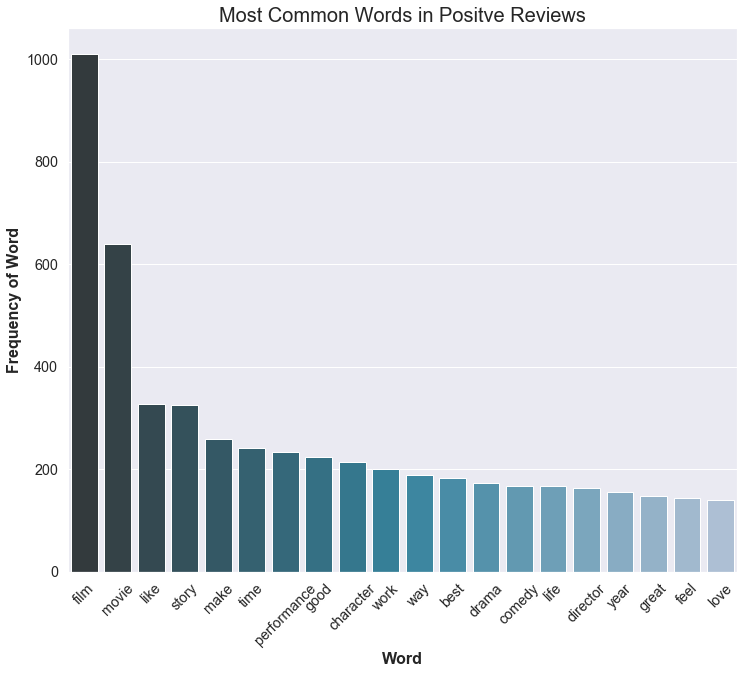

In [216]:
df_pos = new_df[df_quick["Freshness"]==1]
df_pos
X_train_counts_pos = cv.transform(df_pos["text"].values)
word_freq_pos = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_pos.sum(axis=0)).ravel()))
word_counter_pos = Counter(word_freq_pos)
word_counter_df_pos = pd.DataFrame(word_counter_pos.most_common(20), columns = ['word', 'freq'])
df_neg = new_df[df_quick["Freshness"]==0]
X_train_counts_neg = cv.transform(df_neg["text"].values)
word_freq_neg = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_neg.sum(axis=0)).ravel()))
word_counter_neg = Counter(word_freq_neg)
word_counter_df_neg = pd.DataFrame(word_counter_neg.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_pos, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in Positve Reviews",fontsize=20)
plt.savefig("images/most_common_words_pos")
plt.show();

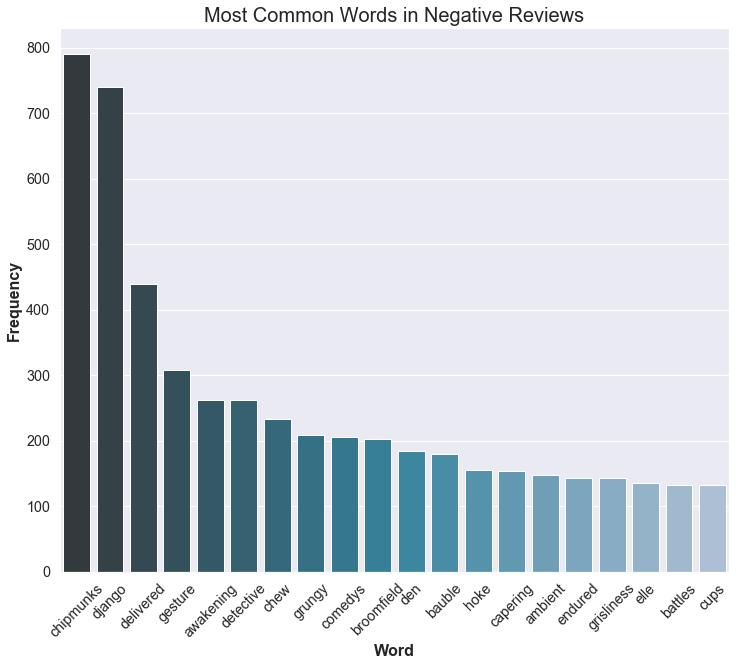

In [217]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_neg")
plt.show();

In [218]:
from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

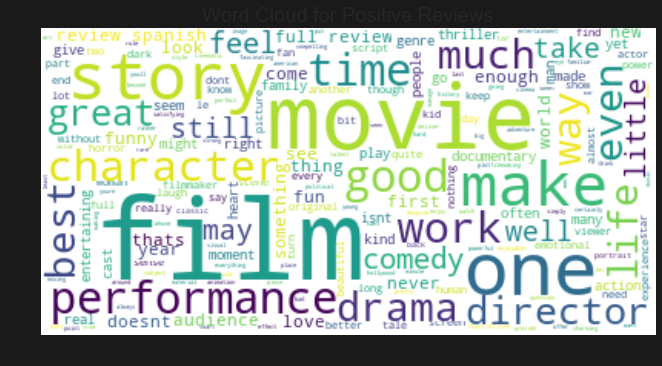

In [225]:
df_pos.head()
temp = df_pos["text"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(figsize = (9,6),facecolor="k")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud.png")
plt.show()

In [231]:
from sklearn.naive_bayes import MultinomialNB

In [346]:
# print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
y=df_quick["Freshness"].values
nb_model.fit(X_train_tfidf_arr, y)
type(X_train_tfidf_arr)

numpy.ndarray

In [347]:
df_test = df[40000:42500]
y_test = df_test["Freshness"].values
#X_test = df_test["Review"].values
df_corpus_test = df_test["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
#bag_of_words = " ".join(df_corpus)
df_corpus_test =df_corpus_test.str.lower()
docs_tokenized_test = [word_tokenize(content) for content in df_corpus_test]
docs_stop_test = [[word for word in words if word not in stop] for words in docs_tokenized_test]
docs_wordnet_test = [[wordnet.lemmatize(word) for word in words] for words in docs_stop_test]
docs_wordnet_test

[['exultant', 'comedy', 'american', 'repression', 'revolt'],
 ['moving', 'term', 'invigorating', 'conversationstarter'],
 ['bullett',
  'raja',
  'director',
  'tigmanshu',
  'dhulias',
  'commercial',
  'film',
  'yet',
  'weakest'],
 ['infinitely',
  'polar',
  'bear',
  'vivid',
  'snapshot',
  'one',
  'family',
  'surviving',
  'state',
  'chaotic',
  'affectionate',
  'imperfection',
  'time',
  'kid',
  'raising',
  'seen',
  'neglect',
  'normal'],
 ['disneypixar',
  'animation',
  'quality',
  'especially',
  'appearance',
  'human',
  'lively',
  'fantasy',
  'pack',
  'enough',
  'tropical',
  'incident',
  'vivid',
  'action',
  'pas',
  'muster'],
 ['de', 'bont', 'simply', 'reprises', 'first', 'film'],
 ['least',
  'cinematic',
  'train',
  'look',
  'pretty',
  'run',
  'track',
  'driving',
  'home',
  'symbolism',
  'people',
  'theater',
  'full',
  'content',
  'review',
  'parent',
  'violence',
  'profanity',
  'nudity',
  'etc',
  'also',
  'available'],
 ['perform

In [348]:
new_element =[]
for element in docs_wordnet_test:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series_test = pd.Series(new_element)
new_series_test
col = "text"
new_df_test = pd.DataFrame(new_series_test,columns = [col])
new_df_test

text
0            exultant comedy american repression revolt
1          moving term invigorating conversationstarter
2     bullett raja director tigmanshu dhulias commer...
3     infinitely polar bear vivid snapshot one famil...
4     disneypixar animation quality especially appea...
5                    de bont simply reprises first film
6     least cinematic train look pretty run track dr...
7     performance make material human accessible mai...
8     filmmaker possessed mutation travel back time ...
9     helen mirrens commanding performance elizabeth...
10    robert zemeckiss walk breathtaking youd hope f...
11    dark shadow amusing fit spurt sure make ton mo...
12    saul dibbs foamy adaptation amanda foreman geo...
13    anders danielsen lie give compelling deepetche...
14    actor support translates screen real communion...
15    surprisingly subtle take aging changing role r...
16    arguably spin control last act overall make wi...
17    movie youll think tomik pretty sick puppy kies...
18    full insanely grand passion bloodthirsty viole...
19    movie raw ambition spirit literally reinvents ...
20    yes absolutely fun well many many thing go boo...
21    another surefire cult hit mancini take chucky ...
22    deliberately oldfashioned ww adventure shine l...
23    extraordinary magical wondrous blessedly origi...
24           w fail drama comedy unclear sequence meant
25    miss sloanes heroine driven craftiness film su...
26    facial jewellery elvis costello music cell pho...
27    film effective need equalizer line see youll find
28    lifeless bythenumbers production excruciating ...
29    predator gut slash way gory scifi mediocrity f...
...                                                 ...
2470  none dahl gift dark humor sparkling writing ev...
2471  knight cup film feel something important say m...
2472  proof positive emperor comedy clothes fact see...
2473  comedic crimer lateinthecycle tarantino retrea...
2474                             glorious new territory
2475  premise look film admittedly innovative scary ...
2476  took still shot one middle action sequence you...
2477  duff make long comparatively dostoyevskian dep...
2478  maturely written richly characterized flawless...
2479     scare quote around movie title never necessary
2480  hero iconic inertia photographed molten sky ju...
2481                            different anything came
2482               loud garish untimely romantic comedy
2483  emotionally rewarding reunion tour established...
2484  film delight aspect disappoints others deft jo...
2485  would take actual work get absolutely everythi...
2486  bad leslie dixon tapped le percent penning und...
2487  many reason treasure david lowerys new film gh...
2488  joss whedon fan wont want miss youre shakespea...
2489  watching movie like going quantum physic sympo...
2490  make cousin rachel engaging audience never qui...
2491  audacious performance veteran actor wonderful ...
2492  many moving part spinning many direction movie...
2493  fool shame fool twice shame fool thrice youre ...
2494  quarantine unavoidable american replica versio...
2495  journey function primarily hopeful story peopl...
2496  fascinating doc couple son nazi war criminal o...
2497  one film running gag despite unfolding apocaly...
2498  much movie good work undone silly unconvincing...
2499  there virtually one zion age except esteemed c...

[2500 rows x 1 columns]

In [349]:
X_test_counts = cv.transform(new_df_test.text.values)
#X_test_counts_arr = X_test_counts.toarray()
#X_test_counts_arr
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_arr = X_test_tfidf.toarray()
# #print(X_test_arr.shape)
# #X_test_std= scaler.fit_transform(X_temp)
# y_test = new_df_test["Freshness"].values
# #print(X_test_counts.shape)
# print(X_test_arr.shape)
nb_model.score(X_train_tfidf_arr,y)

0.8305

In [350]:
nb_model.score(X_test_arr, y_test)

0.726

In [311]:
ans = nb_model.predict_proba(X_test_arr)
ans

array([[0.4794465 , 0.5205535 ],
       [0.24109795, 0.75890205],
       [0.77891495, 0.22108505],
       ...,
       [0.59507735, 0.40492265],
       [0.60718172, 0.39281828],
       [0.526832  , 0.473168  ]])

In [312]:
y_predict = nb_model.predict(X_test_arr)
y_predict

array([1, 1, 0, ..., 0, 0, 0])

In [313]:
sum(y_predict)

1197

In [245]:
from sklearn import metrics

In [335]:
metrics.confusion_matrix(y_test, y_predict)

array([[946, 341],
       [357, 856]])

In [336]:
#false positives
false_positives = new_df_test[y_predict > y_test]
false_positives

text
8     filmmaker possessed mutation travel back time ...
11    dark shadow amusing fit spurt sure make ton mo...
25    miss sloanes heroine driven craftiness film su...
26    facial jewellery elvis costello music cell pho...
38    world war ii movie dad fall asleep watching couch
62    stepford wife terrific comedy lousy motion pic...
69    technically excellent throughout style strong ...
70    although strives thought provoking exploration...
75              doesnt wit doesnt style best bond movie
101   love grownup may feel theyve seen lot especial...
119   story whose appeal hinge saving grace getting ...
135   youre lucky rare figure robot fighting eventually
136   walking dinosaur gorgeous meticulously detaile...
144   woodleys solid performance cant keep adrift st...
150   red riding hood hardwicke might tough time hol...
154   new film keep original story even original lin...
177   spectacular failure film aesthetic make tremen...
187   july provocative honorably independent filmmak...
192   furtive figure history know best watergate sni...
196   whole seems meander aimlessly rarely creating ...
198   pulse erudition visual kick dulled impact time...
201   smattering effective moment creepy cinematogra...
204   amid episodic muddle din done yet feel assured...
211   even look past horror flick hopelessly flawed ...
213   typical pic adherence rigid genre convention f...
219   eastwood display futility iraq war given year ...
236   problem screen adaptation young adult novelsth...
240   john carter arriving late party george lucas a...
241   exhibitionist ferrell finding another excuse e...
268   dramatic theme echo great crime movie seventy ...
...                                                 ...
2252  gigli pretend sophisticated comedy sex yet wri...
2261  greatest puzzle surrounding tom hank latest fo...
2267  nun predictable modern horror offering exact o...
2278  solitary act could saved film would chosen scr...
2285  like trojan horse troy built shell first glanc...
2303  lagravenese horse whisperer tendency sanitize ...
2304                          even stork must move time
2310  authentic account stressedout parenting anyone...
2319  churning secret nostakes genre thriller dirtch...
2321  sanchez easy time since blair witch handheld r...
2331  repeat business filmmaker valentine day except...
2332  long string heavyfooted sight sound gag must s...
2341  waterboy arguably sandlers enjoyable motion pi...
2359  producer bruckheimer director bay sunk new low...
2369                        one big fat schmaltzy drama
2371          finale best could say well ive seen worse
2379  kibitzing parent moral wiggle room godless wor...
2381  da sweet blood jesus bold wildly uneven bloody...
2389  new ghostbusters frequently funny although mov...
2394  akin favorite american idol contestant prematu...
2405  miracle modern technology film achieves alchem...
2407  gospel according republican michael moore turn...
2422  film never transcends subject matter informati...
2432  good life stylistically ambitious heartfelt fe...
2439  movie becomes another line ageold tale man gai...
2446  potentially exceptional story told flatly unex...
2456  amid selfconscious cleverness one sequence bui...
2465  rendition worst flaw political deckstacking wi...
2472  proof positive emperor comedy clothes fact see...
2492  many moving part spinning many direction movie...

[341 rows x 1 columns]

In [337]:
#false negatives
false_neg = new_df_test[y_predict < y_test]
false_neg

text
14    actor support translates screen real communion...
30        fairly unconvincing heart roughly right place
31    hard say whether mendes egger complement other...
32    mendes working script husbandandwife hipster d...
36    film belongs noble heritage beery dvd night ta...
50    girl played fire nearly admirable dragon tatto...
81    step another vehicle showcasing latest creativ...
82    absolutely ingenious know car car movie richer...
85    computer chess open many interpretation great ...
86    thor ragnarok fun thor movie long shot still m...
88    eminem manages take think know eminem inject c...
103   movie onceoverlightliness stay one given intel...
109   story isnt complete end volume ii many heady p...
111   work painstaking part dont feel pain taken ach...
126   dear white people biggest flaw excessive ambit...
139   viggo mortensen save almost anything full revi...
153   spectre far bad likely frustrate many fan espe...
155   spite early disclaimer state book shouldnt rea...
171   really want keep relationship catcher rye sacr...
195   best thing hunger game mockingjay part unconce...
197   film seems le problem idea story could dramatized
205   wondrous film kind since et extra terrestrial ...
206                           one scariest movie stream
209   michael mann foregoes pastel panache original ...
223   stewart pattinson convincing chemistry starcro...
225   feel like something dali would dreamed imbibin...
227   ang lee film show even modicum originality dir...
229   engaging thriller thoroughly satisfy genre fan...
231   interesting yet erratic truelife story could m...
233                          sure wow critic movie mass
...                                                 ...
2249  one weepie never resort cheap manipulation tha...
2273               transformer leaf block left unbusted
2276  certainly fate worldtm stake say quite bit lim...
2287  entertainment cardboard weightless isnt respon...
2298  enough freshness documentarystyle observation ...
2306  playful riff film noir start upending every mo...
2324  dave simply put bad man part brilliance harrel...
2325  john tucker must die clever enough avoid place...
2326  closest thing straightup alien remake series s...
2334  silver belle five former harlem chorus girl st...
2351  fulfills requirement genre admirably never ris...
2353  ferrells movie meaning inspired laugh sandwich...
2356  may biggest flatscreen dlp monitor city red cl...
2363  movie struggle keep momentum stall actual heis...
2373            really immersed believable world future
2375  best skull island delivers colossal big screen...
2378  spiderman homecoming improbable successfully r...
2399                       step vhs behind music series
2404  committeeengineered product designed boost fir...
2415  american teen feel like truth still stranger f...
2425  fullspeed ahead testosterone thing would class...
2430  draw like sore tooth one cant stop probing one...
2441  film lively invention pay however reach epic s...
2444  fun action nonsense classic rock overthetop si...
2457  car narrowly avoids becoming pixars first trul...
2464  entertaining popcorn movie sure satisfy target...
2467  funciona principalmente graas maneira eficaz c...
2470  none dahl gift dark humor sparkling writing ev...
2498  much movie good work undone silly unconvincing...
2499  there virtually one zion age except esteemed c...

[357 rows x 1 columns]

In [338]:
X_train_counts_fp = cv.transform(false_positives["text"].values)
word_freq_fp = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_fp.sum(axis=0)).ravel()))
word_counter_fp = Counter(word_freq_fp)
word_counter_df_fp = pd.DataFrame(word_counter_fp.most_common(20), columns = ['word', 'freq'])

X_train_counts_fn = cv.transform(false_neg["text"].values)
word_freq_fn = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_fn.sum(axis=0)).ravel()))
word_counter_fn = Counter(word_freq_fn)
word_counter_df_fn = pd.DataFrame(word_counter_fn.most_common(20), columns = ['word', 'freq'])



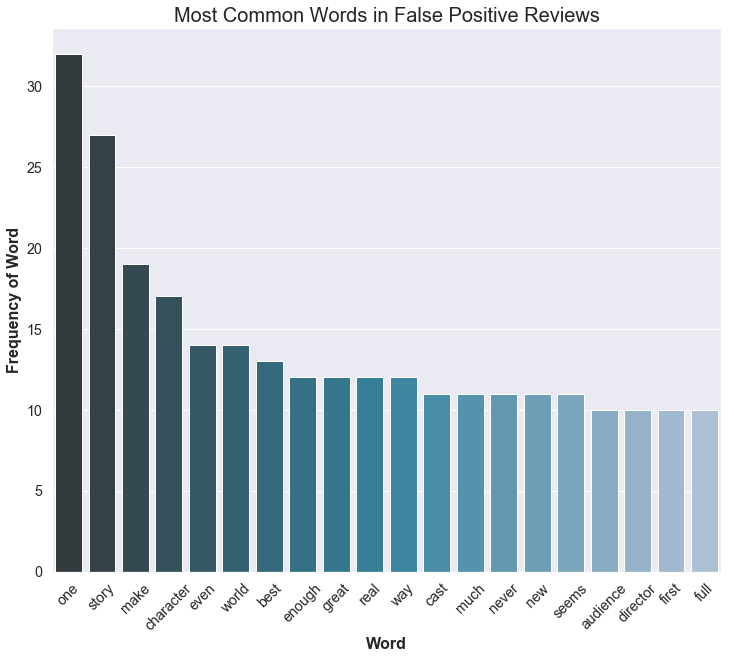

In [339]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fp, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in False Positive Reviews",fontsize=20)
plt.savefig("images/most_common_words_fp")
plt.show();

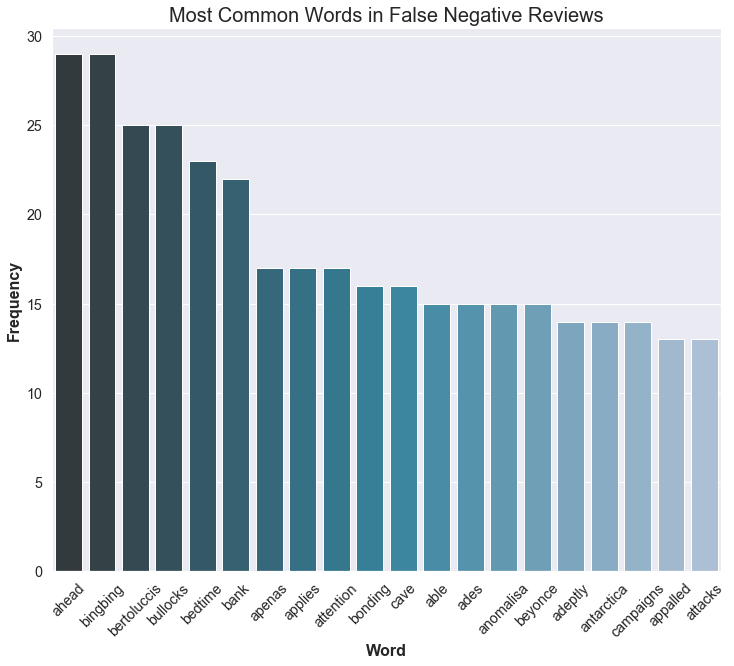

In [340]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fn, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in False Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_fn")
plt.show();